## Linearity

We consider a second order system of the form:

\begin{align}
    G(s) = \frac{1}{ms^2 + cs + k}
\end{align}

with 

\begin{align}
    m = 1 kg, \quad c = 4 \frac{Ns}{m}, \quad k = 5 \frac{N}{m}
\end{align}

Lets see if this idea of linear systems actually applies!


In [21]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

### Initial position and intial velocity cases

\begin{align}
    f(t) = 0, \quad x(0) = 1 m, \quad \dot{x}(0) = 0 \\
    f(t) = 0, \quad x(0) = 0, \quad \dot{x}(0) = 1 \frac{m}{sec}
\end{align}

We analytically found these solutions so lets write a function for it.

In [30]:
def x1(t,x0):
    x1 = x0*(np.exp(-2*t)*np.cos(t) + 2*np.exp(-2*t)*np.sin(t))
    return x1

def x2(t, xd0):
    x2 = xd0*(np.exp(-2*t)*np.sin(t))
    return x2

### Impulse response

We also know the response to an impulse!

In [3]:
def x3(t,f0):
    x3 = f0*(np.exp(-2*t)*np.sin(t))
    return x3

## Numerical vs. Analytical responses

Now we compare our analytical solution to a numerical one

In [77]:
def pltresp(x0, xd0):
    num = 1
    den = [1, 4, 5]
    
    time = np.linspace(0,5,100)
    
    sys = signal.TransferFunction(num,den)
    t, resp = signal.impulse2(sys,X0=(xd0, x0), T=time)
    
    # compute our analytical approximation
    x1resp = x1(time,x0)
    x2resp = x2(time,xd0)
    x3resp = x3(time,1)
    
    fig, ax = plt.subplots(1,1,figsize=(16,8))
    ax.plot(t,resp, label='Numerical')
    ax.plot(time,x1resp+x2resp+x3resp,label='Analytical')
    ax.set_title('Response')
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Response')
    ax.grid(True)
    plt.legend()
    
    return 0

0

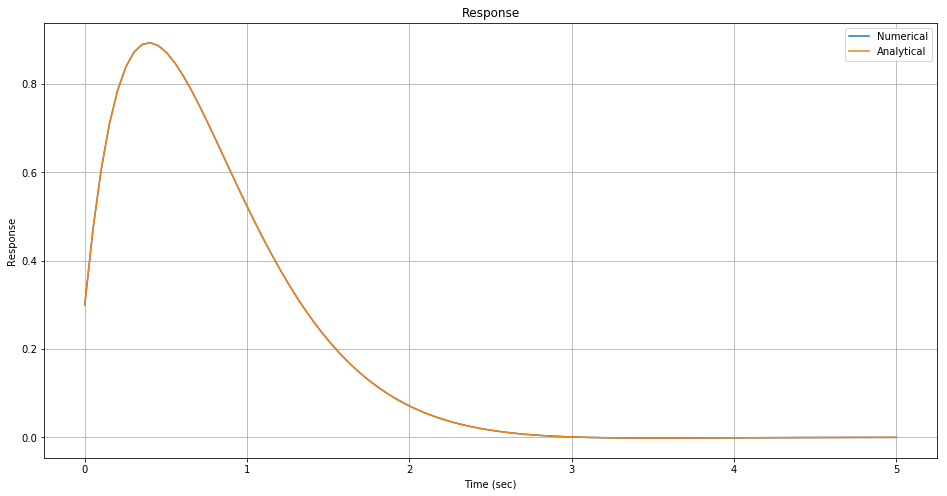

In [78]:
_ = interact(pltresp, x0=(0,5,0.1), xd0=(0.0,5,0.1))